In [14]:
import numpy as np
from numpy import ndarray
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from helper_functions import plot_drawings, get_error_rate
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


**Problem Statement 1**

Write a neural network to recognize two handwritten digits, zero and one.


+ The data set contains 1000 training examples of handwritten digits, here limited to zero and one.  
+ Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
+ Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
+ The 20 by 20 grid of pixels is flattened into a 400-dimensional vector. 

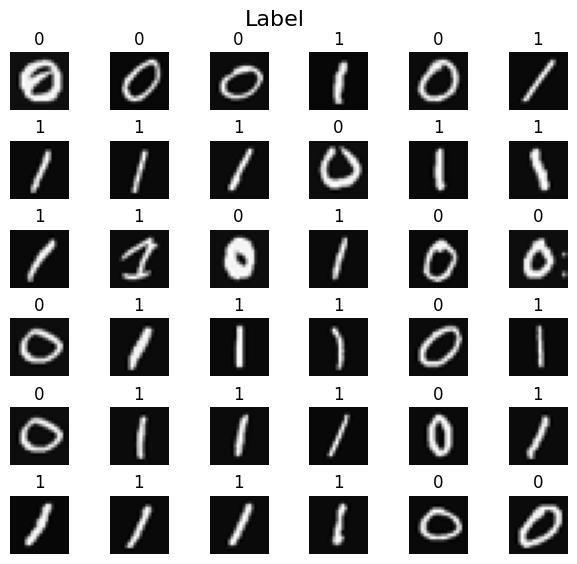

In [2]:
# Load provided data
X, y = np.load("data/neural_network1.npy"), np.load("data/neural_network2.npy")
X, y = X[0:1000], y[0:1000]
assert X.shape == (1000, 400)
assert y.shape == (1000, 1)
plot_drawings(X, y, 6)


Build the TensorFlow model with 3 layers. 25, 15 and 1 nodes respectively:

In [3]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation="sigmoid"),
    Dense(units=15, activation="sigmoid"),
    Dense(units=1, activation="sigmoid")
], name = "digit_recognition_0-1")
model.summary()


Model: "digit_recognition_0-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-26 23:11:13.983072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-26 23:11:13.983279: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Define a loss function and run gradient descent to fit the weights of the model to the training data:

In [4]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(X, y, epochs=20)


Epoch 1/20
32/32 [==============================] - 0s 673us/step - loss: 0.6275
Epoch 2/20
32/32 [==============================] - 0s 528us/step - loss: 0.4692
Epoch 3/20
32/32 [==============================] - 0s 608us/step - loss: 0.3268
Epoch 4/20
32/32 [==============================] - 0s 580us/step - loss: 0.2286
Epoch 5/20
32/32 [==============================] - 0s 463us/step - loss: 0.1674
Epoch 6/20
32/32 [==============================] - 0s 488us/step - loss: 0.1285
Epoch 7/20
32/32 [==============================] - 0s 477us/step - loss: 0.1024
Epoch 8/20
32/32 [==============================] - 0s 463us/step - loss: 0.0838
Epoch 9/20
32/32 [==============================] - 0s 467us/step - loss: 0.0702
Epoch 10/20
32/32 [==============================] - 0s 470us/step - loss: 0.0599
Epoch 11/20
32/32 [==============================] - 0s 600us/step - loss: 0.0520
Epoch 12/20
32/32 [==============================] - 0s 455us/step - loss: 0.0457
Epoch 13/20
32/32 [======

Check and plot predictions:

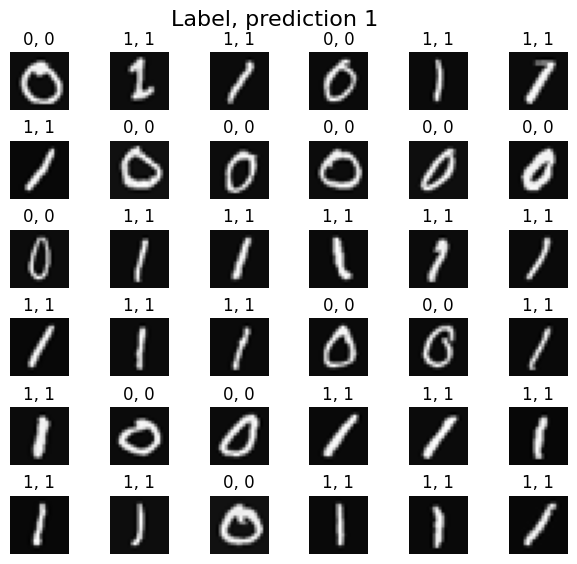

In [5]:
plot_drawings(X, y, 6, model)


**Problem Statement 2**

Build a dense layer subroutine for NumPy, then create a model using this subrouting:

In [6]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

class My_sequential:
    def __init__(self, W1, b1, W2, b2, W3, b3):
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.W3 = W3
        self.b3 = b3

    def predict(self, x):
        a1 = self.my_dense(x,  self.W1, self.b1, sigmoid)
        a2 = self.my_dense(a1, self.W2, self.b2, sigmoid)
        a3 = self.my_dense(a2, self.W3, self.b3, sigmoid)
        return(a3)

    def my_dense(self, a_in: ndarray, W: ndarray, b: ndarray, g) -> ndarray:
        """
        Computes dense layer.

        Args:
            a_in (ndarray): Input data.
            W (ndarray): Weight matrix, n features per unit, j units.
            b (ndarray): Bias vector, j units.
            g: Activation function.

        Returns:
            ndarray: Activations.
        """
        units = W.shape[1]
        a_out = np.zeros(units)
        for j in range(units):
            w = W[:, j]
            z = np.dot(w, a_in) + b[j]
            a_out[j] = g(z)
        return(a_out)

x_tst = 0.1*np.arange(1,3,1).reshape(2,)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)
assert np.allclose(
    My_sequential.my_dense(_, x_tst, W_tst, b_tst, sigmoid),
    [0.54735762, 0.57932425, 0.61063923]
)


Copy trained weights and biases from Tensorflow and plot predictions using this model:

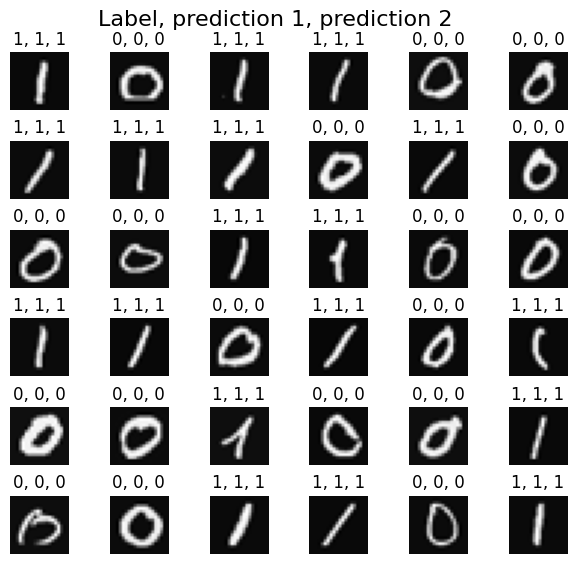

In [7]:
# Copy weights
[layer1, layer2, layer3] = model.layers
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

# Make predictions
model2 = My_sequential(W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
plot_drawings(X, y, 6, model, model2)


**Problem Statement 3**

Write a neural network to recognize handwritten digits.


+ The data set contains 5000 training examples of handwritten digits.
+ Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
+ Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
+ The 20 by 20 grid of pixels is flattened into a 400-dimensional vector.

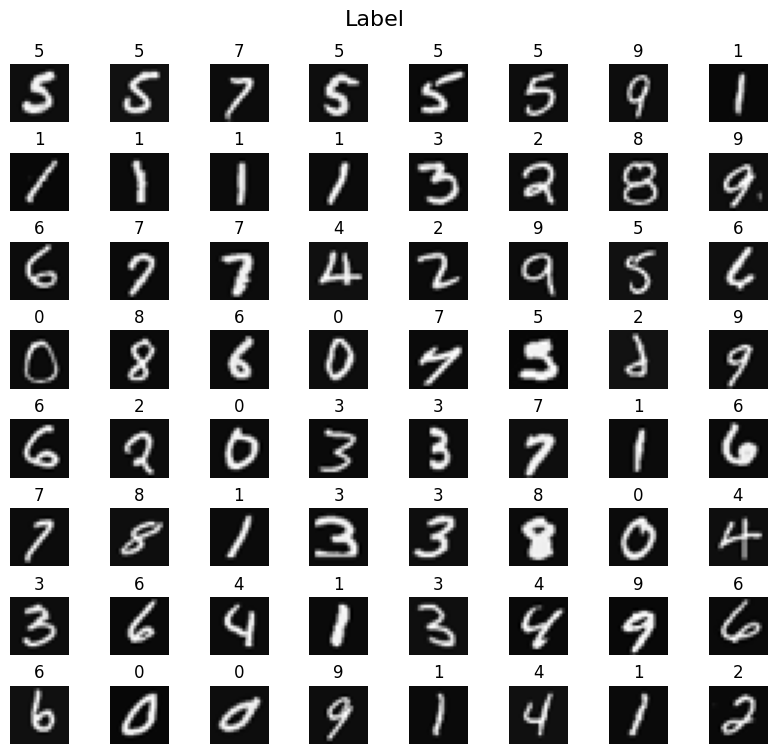

In [8]:
# Load provided data
X, y = np.load("data/neural_network1.npy"), np.load("data/neural_network2.npy")
assert X.shape == (5000, 400)
assert y.shape == (5000, 1)
plot_drawings(X, y, 8)


Build the TensorFlow model with 3 layers. 25, 15 and 10 nodes respectively:

In [9]:
model3 = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation="relu"),
    Dense(units=15, activation="relu"),
    Dense(units=10, activation="linear")
], name = "digit_recognition_0-9")
model3.summary()


Model: "digit_recognition_0-9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Define a loss function and run gradient descent to fit the weights of the model to the training data:

In [12]:
model3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model3.fit(X, y, epochs=80)


Epoch 1/80
157/157 [==============================] - 0s 487us/step - loss: 0.0190
Epoch 2/80
157/157 [==============================] - 0s 472us/step - loss: 0.0158
Epoch 3/80
157/157 [==============================] - 0s 435us/step - loss: 0.0132
Epoch 4/80
157/157 [==============================] - 0s 509us/step - loss: 0.0127
Epoch 5/80
157/157 [==============================] - 0s 466us/step - loss: 0.0165
Epoch 6/80
157/157 [==============================] - 0s 519us/step - loss: 0.0112
Epoch 7/80
157/157 [==============================] - 0s 481us/step - loss: 0.0095
Epoch 8/80
157/157 [==============================] - 0s 525us/step - loss: 0.0077
Epoch 9/80
157/157 [==============================] - 0s 445us/step - loss: 0.0075
Epoch 10/80
157/157 [==============================] - 0s 457us/step - loss: 0.0067
Epoch 11/80
157/157 [==============================] - 0s 454us/step - loss: 0.0074
Epoch 12/80
157/157 [==============================] - 0s 488us/step - loss: 0.0064
E

Check and plot predictions:

  1/157 [..............................] - ETA: 3s

157/157 [==============================] - 0s 360us/step
0 errors out of 5000 examples: 0.0% error rate


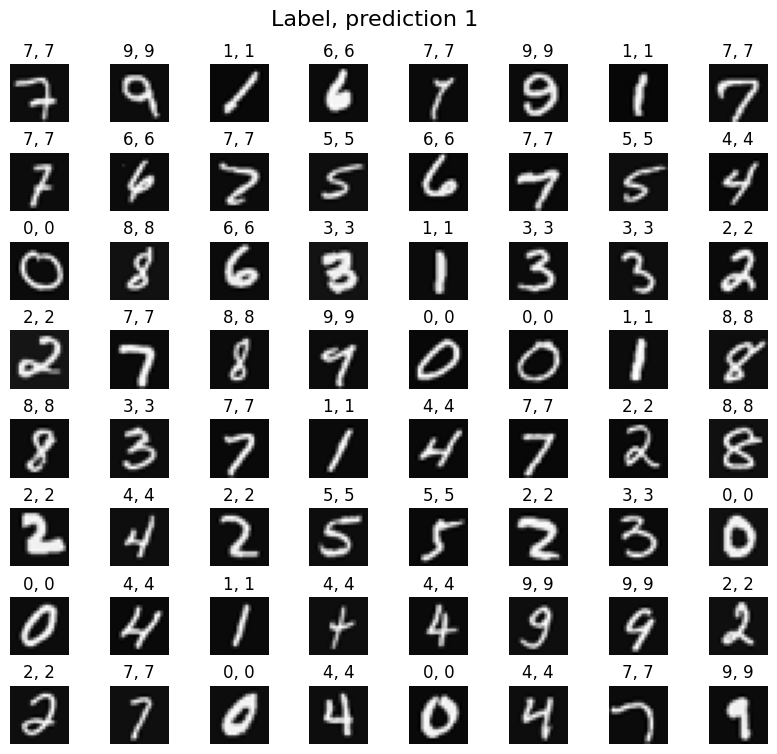

In [13]:
get_error_rate(model3, X, y)
plot_drawings(X, y, 8, model3=model3)
